## 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd
import warnings
import gc
warnings.filterwarnings("ignore")

In [74]:
from tqdm import tqdm_notebook

In [65]:
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 100)

## 기존 dtype
* [커널](www.kaggle.com)

In [3]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [4]:
%%time
train = pd.read_csv('./data/train.csv', dtype=dtypes)
test = pd.read_csv('./data/test.csv', dtype=dtypes)

Wall time: 3min 51s


In [5]:
test['HasDetections'] = np.nan
data = train.append(test)

In [138]:
data.isna().any()

MachineIdentifier                                    False
ProductName                                          False
EngineVersion                                        False
AppVersion                                           False
AvSigVersion                                         False
IsBeta                                               False
RtpStateBitfield                                      True
IsSxsPassiveMode                                     False
DefaultBrowsersIdentifier                             True
AVProductStatesIdentifier                             True
AVProductsInstalled                                   True
AVProductsEnabled                                     True
HasTpm                                               False
CountryIdentifier                                    False
CityIdentifier                                        True
OrganizationIdentifier                                True
GeoNameIdentifier                                     Tr

In [9]:
cols = data.isna().any()

In [14]:
cols = cols[cols == True].index[:-1]

In [102]:
meta = pd.DataFrame(index=cols, columns=cols, data=0)

In [104]:
%%time
for col1 in tqdm_notebook(cols):
    for col2 in cols:
        temp = data[[col1, col2]].isna()
        
        meta.loc[col1, col2] = np.sum((temp.iloc[:,0] & temp.iloc[:,1]) * 1) / (np.sum(data[col1].isna() * 1) + 0.0000000000001)

Wall time: 21min 49s


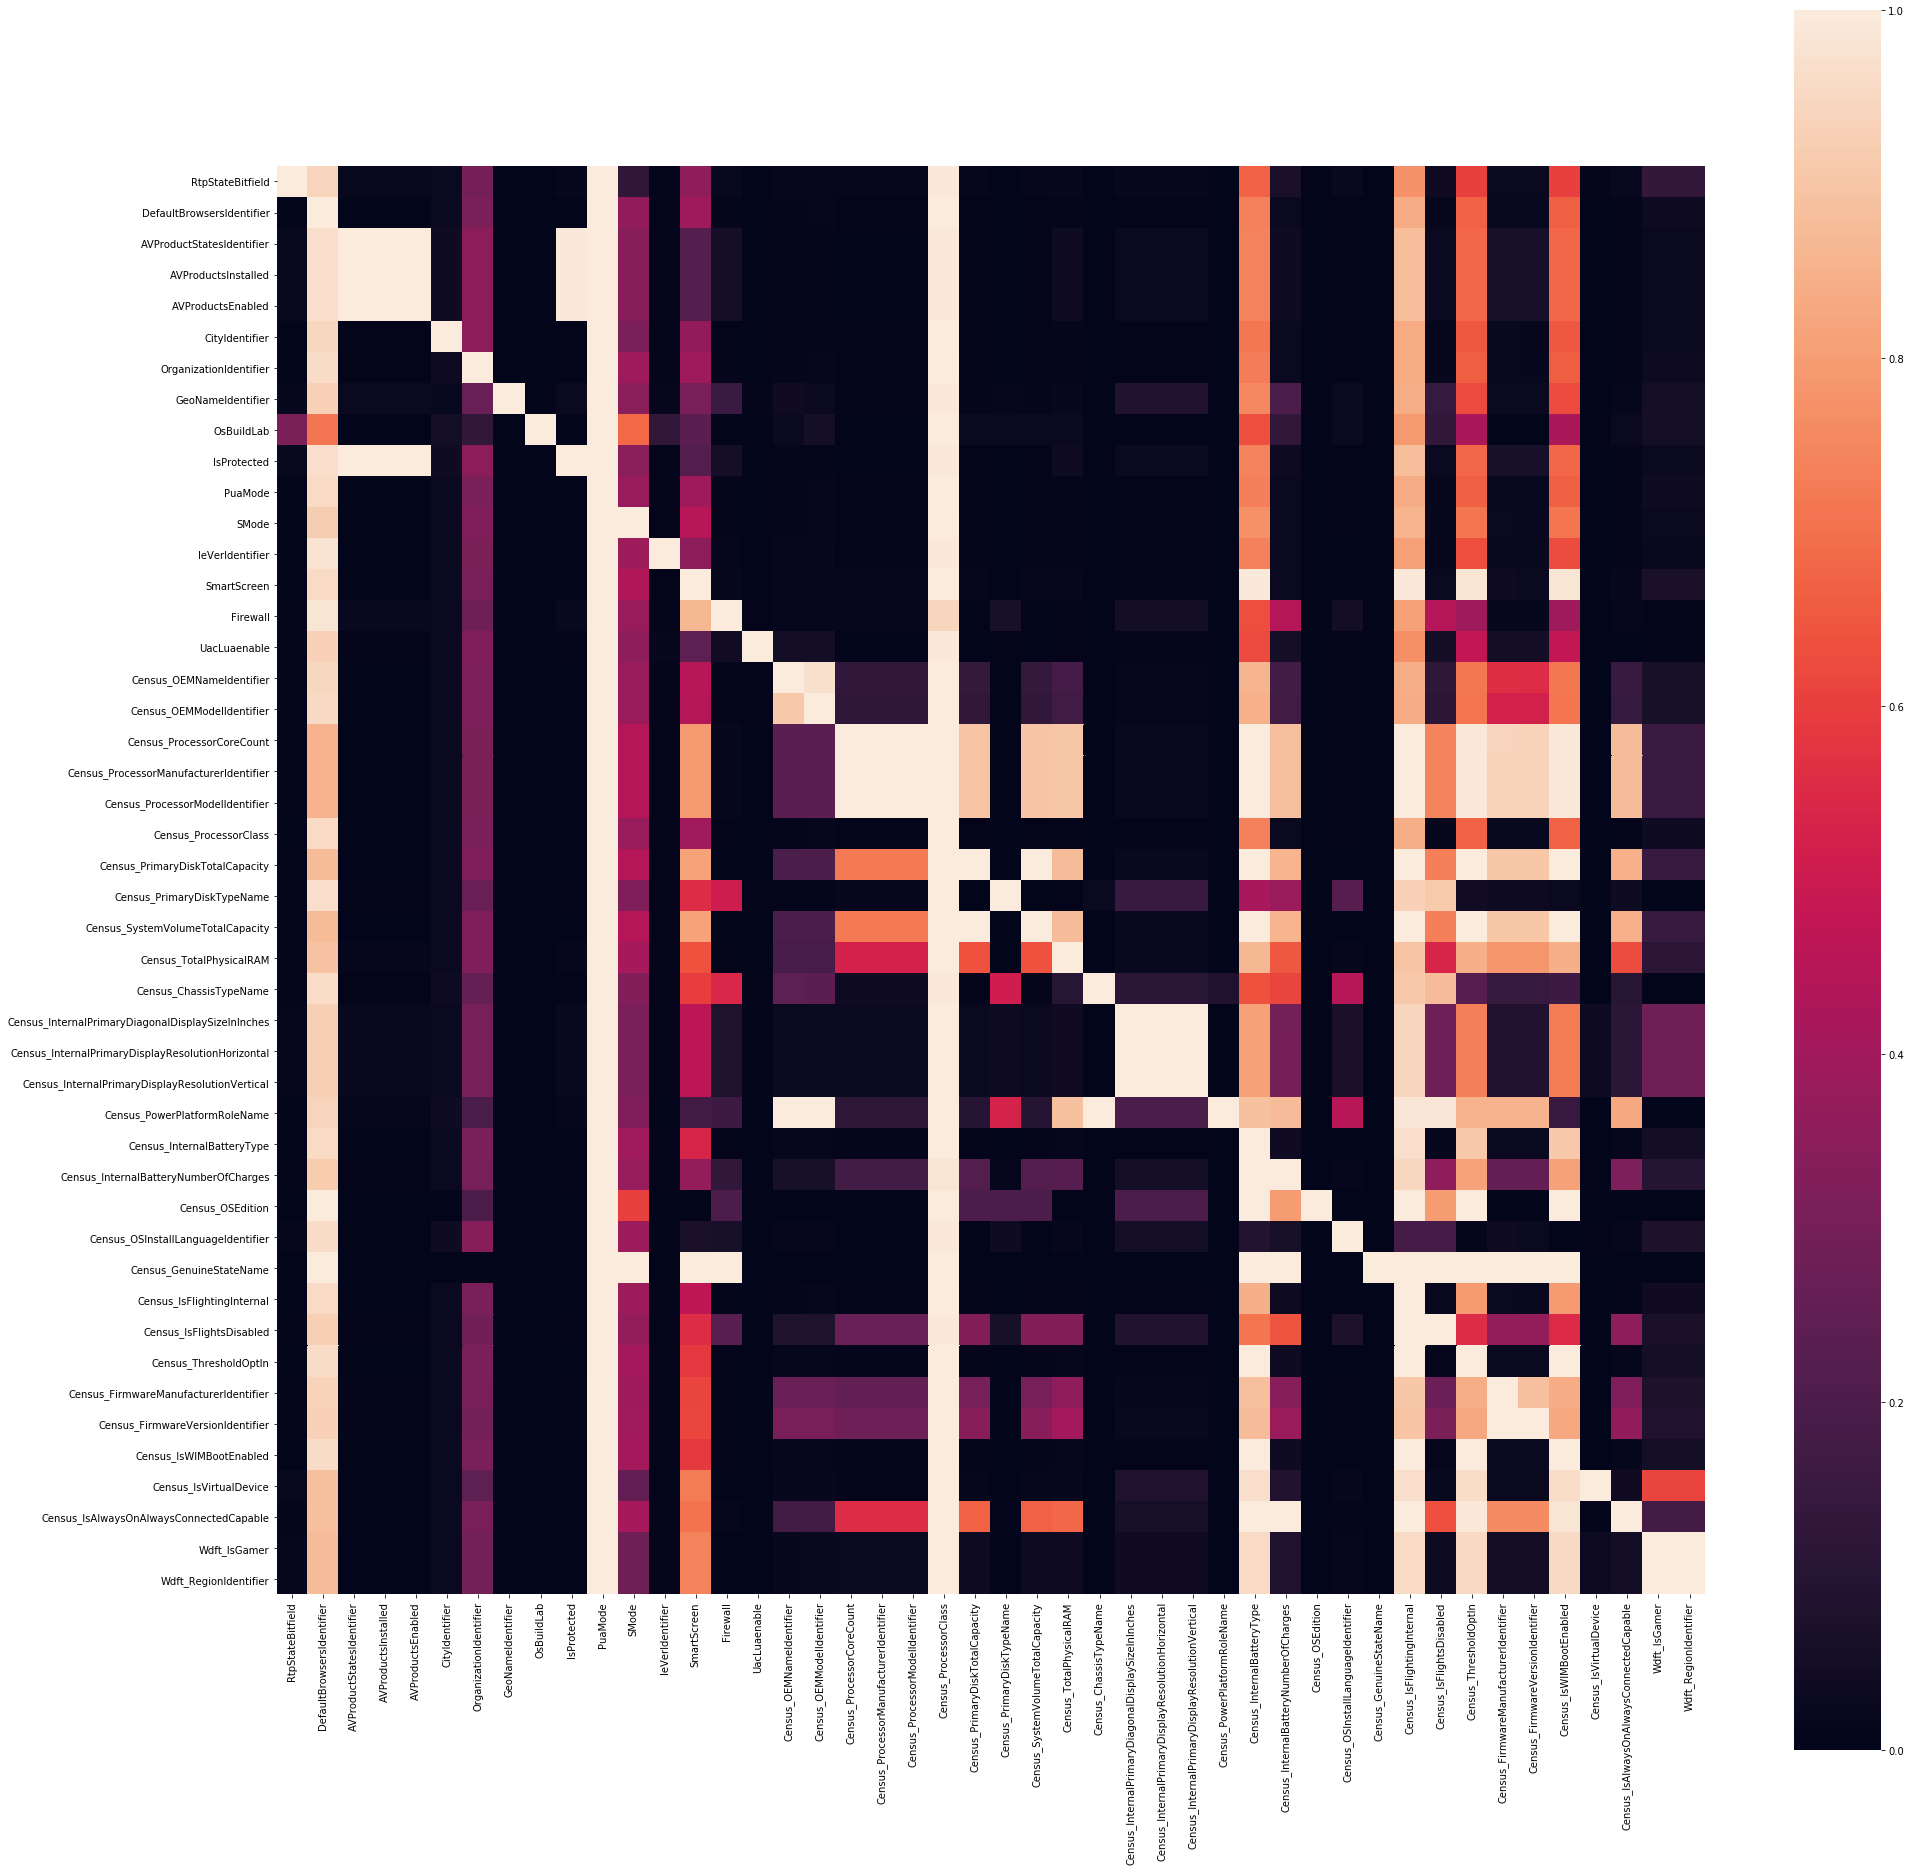

In [118]:
plt.subplots(figsize=(32,32))
sns.heatmap(meta, square=True)
plt.show();

In [134]:
result = []
for i, col1 in enumerate(cols):
    for j, col2 in enumerate(cols):        
        if i < j:
            if meta.loc[col1, col2] >= 0.9 and meta.loc[col2, col1] >= 0.9:
                result.append([col1, col2])

In [121]:
meta.RtpStateBitfield.sort_values()

Census_GenuineStateName                              0.000000
Census_OSEdition                                     0.000000
Census_PowerPlatformRoleName                         0.000000
SMode                                                0.001297
IeVerIdentifier                                      0.002926
Census_IsWIMBootEnabled                              0.003474
Census_ThresholdOptIn                                0.003478
SmartScreen                                          0.003488
Census_InternalBatteryType                           0.003510
Census_IsFlightingInternal                           0.003546
OrganizationIdentifier                               0.003690
DefaultBrowsersIdentifier                            0.003787
Census_ProcessorClass                                0.003831
PuaMode                                              0.003848
CityIdentifier                                       0.003887
UacLuaenable                                         0.004170
Census_O